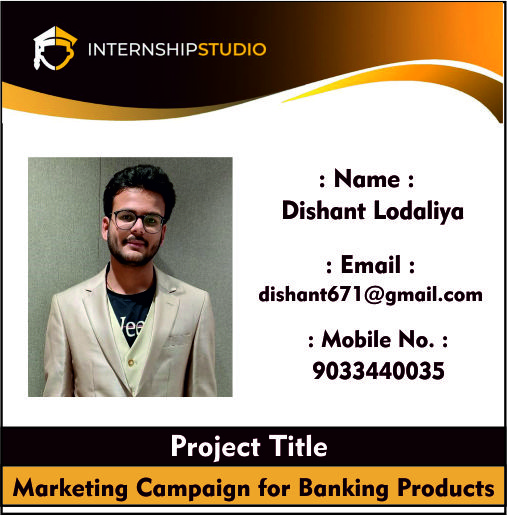

**INTERNSHIP STUDIO - MACHINE LEARNING PROJECT**

> Name: **Dishant Lodaliya**

> E-Mail ID: **dishant671@gmail.com**

# Project Title:  **Marketing Campaign for Banking Products**
**Data Description** 
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

Data: https://www.kaggle.com/itsmesunil/bank-loan-modelling/download


**Objective::** The Classification Goal is to Predict the likelihood of a liability customer buying personal loans.




> **Task : 1**


>Import the datasets and libraries, check datatype, statistical summary, shape, null
values etc



In [ ]:
#I have Imported All The Libraries That will be Needed In Project
import io
import pandas as pd
import numpy as np
import seaborn as sns                      
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split      

%matplotlib inline

#Importing Dataset By Selecting File
from google.colab import files
fileuploded = files.upload()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving bankdata.csv to bankdata.csv




> **Reading And Displaying the dataset Values from data.csv**



In [ ]:
#Reading All the Values Of bankda.csv File And Displaying Data
data=pd.read_csv('bankdata.csv')

#Dislaying Only First 5 Data Of The Data by data.head()
data.head()


ID  Age  Experience  ...  CD Account  Online  CreditCard
0   1   25           1  ...           0       0           0
1   2   45          19  ...           0       0           0
2   3   39          15  ...           0       0           0
3   4   35           9  ...           0       0           0
4   5   35           8  ...           0       0           1

[5 rows x 14 columns]

In [ ]:
#Dislaying Only Last 5 Data Of The Data by data.tail()
data.tail()

ID  Age  Experience  ...  CD Account  Online  CreditCard
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5 rows x 14 columns]



> **Checking DataType,Statistical Summary and Shape Of Data and Checking Null in data.csv**




In [ ]:
# Displaying Overall Information About data.csv DataFile
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


>**Checking For Duplicate Data in data.csv**

In [ ]:
#data.duplicated() will give count of total duplicated data
print("Total Duplicates in Data are : ",sum(data.duplicated()))

Total Duplicates in Data are :  0



> **Now Diplaying Statistical Summary of Data Contained in the data.csv**


In [ ]:
#data.describe() will describe the data and display all the staistical summary of data in data.csv
data.describe()

ID          Age  ...       Online   CreditCard
count  5000.000000  5000.000000  ...  5000.000000  5000.000000
mean   2500.500000    45.338400  ...     0.596800     0.294000
std    1443.520003    11.463166  ...     0.490589     0.455637
min       1.000000    23.000000  ...     0.000000     0.000000
25%    1250.750000    35.000000  ...     0.000000     0.000000
50%    2500.500000    45.000000  ...     1.000000     0.000000
75%    3750.250000    55.000000  ...     1.000000     1.000000
max    5000.000000    67.000000  ...     1.000000     1.000000

[8 rows x 14 columns]


> **Displaying The Shape Of Data in data.csv**





In [ ]:
#data.shape() will show the dimensions of Data in data.csv
print("Shape Of Data is (Rows x Columns)::",data.shape)

Shape Of Data is (Rows x Columns):: (5000, 14)


>**Counting Null Values in Dataset data.csv**

In [ ]:
#We are Checking Whether There are Null Values Contained or Not
print("Column Name        Total Null")

#It Will Display Total Count Of Null Data
data.isnull().sum()

Column Name        Total Null


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

>**Displaying All The Column Names OF Dataet data.csv**

In [ ]:
#Displaying All The Column Names OF Dataet data.csv
print("All Columns in Dataset data.csv are : ",data .columns)

All Columns in Dataset data.csv are :  Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')




>**Task : 2**

> **Check if you need to clean the data for any of the variables**

In [ ]:
#Dropping Irrelevant Columns Temporarily Using tempdata
tempdata = data
correlation= tempdata['Age'].corr(tempdata['Experience'])
print("Correlation is :" ,correlation)
tempdata = tempdata.drop(['ID','Experience'],axis=1 )


Correlation is : 0.9942148569683321


In [ ]:
#After Dropping Column in Tempdata Data of Tempdata is
print("After Dropping Column in Tempdata Data of Tempdata is (Diplayed First 5 Data): ")
tempdata.head()

After Dropping Column in Tempdata Data of Tempdata is (Diplayed First 5 Data): 


Age  Income  ZIP Code  ...  CD Account  Online  CreditCard
0   25      49     91107  ...           0       0           0
1   45      34     90089  ...           0       0           0
2   39      11     94720  ...           0       0           0
3   35     100     94112  ...           0       0           0
4   35      45     91330  ...           0       0           1

[5 rows x 12 columns]



> **Task : 3**


> **EDA: Study the data distribution in each attribute and target  variable, share your findings.**



1) Number of unique in each column?

In [ ]:
#Displaying Number Of Unique In Each Colums
print("Total Uniques in Each Column Data")
data.nunique()

Total Uniques in Each Column Data


ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

2) Number of people with zero mortgage?

In [ ]:
print('Number Of Peoples With Zero Mortrage =',len(data[data.Mortgage==0]))

Number Of Peoples With Zero Mortrage = 3462


3) Number of people with zero credit card spending per month?

In [ ]:
print('Number Of People With Zero Credit Card Average =',len(data[data.CCAvg==0]));


Number Of People With Zero Credit Card Average = 106


4) Value counts of all categorical columns.


In [ ]:
print("Value Count in Data")
data.Family.value_counts()

Value Count in Data


1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
data.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
data['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
data['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
data.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
data.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

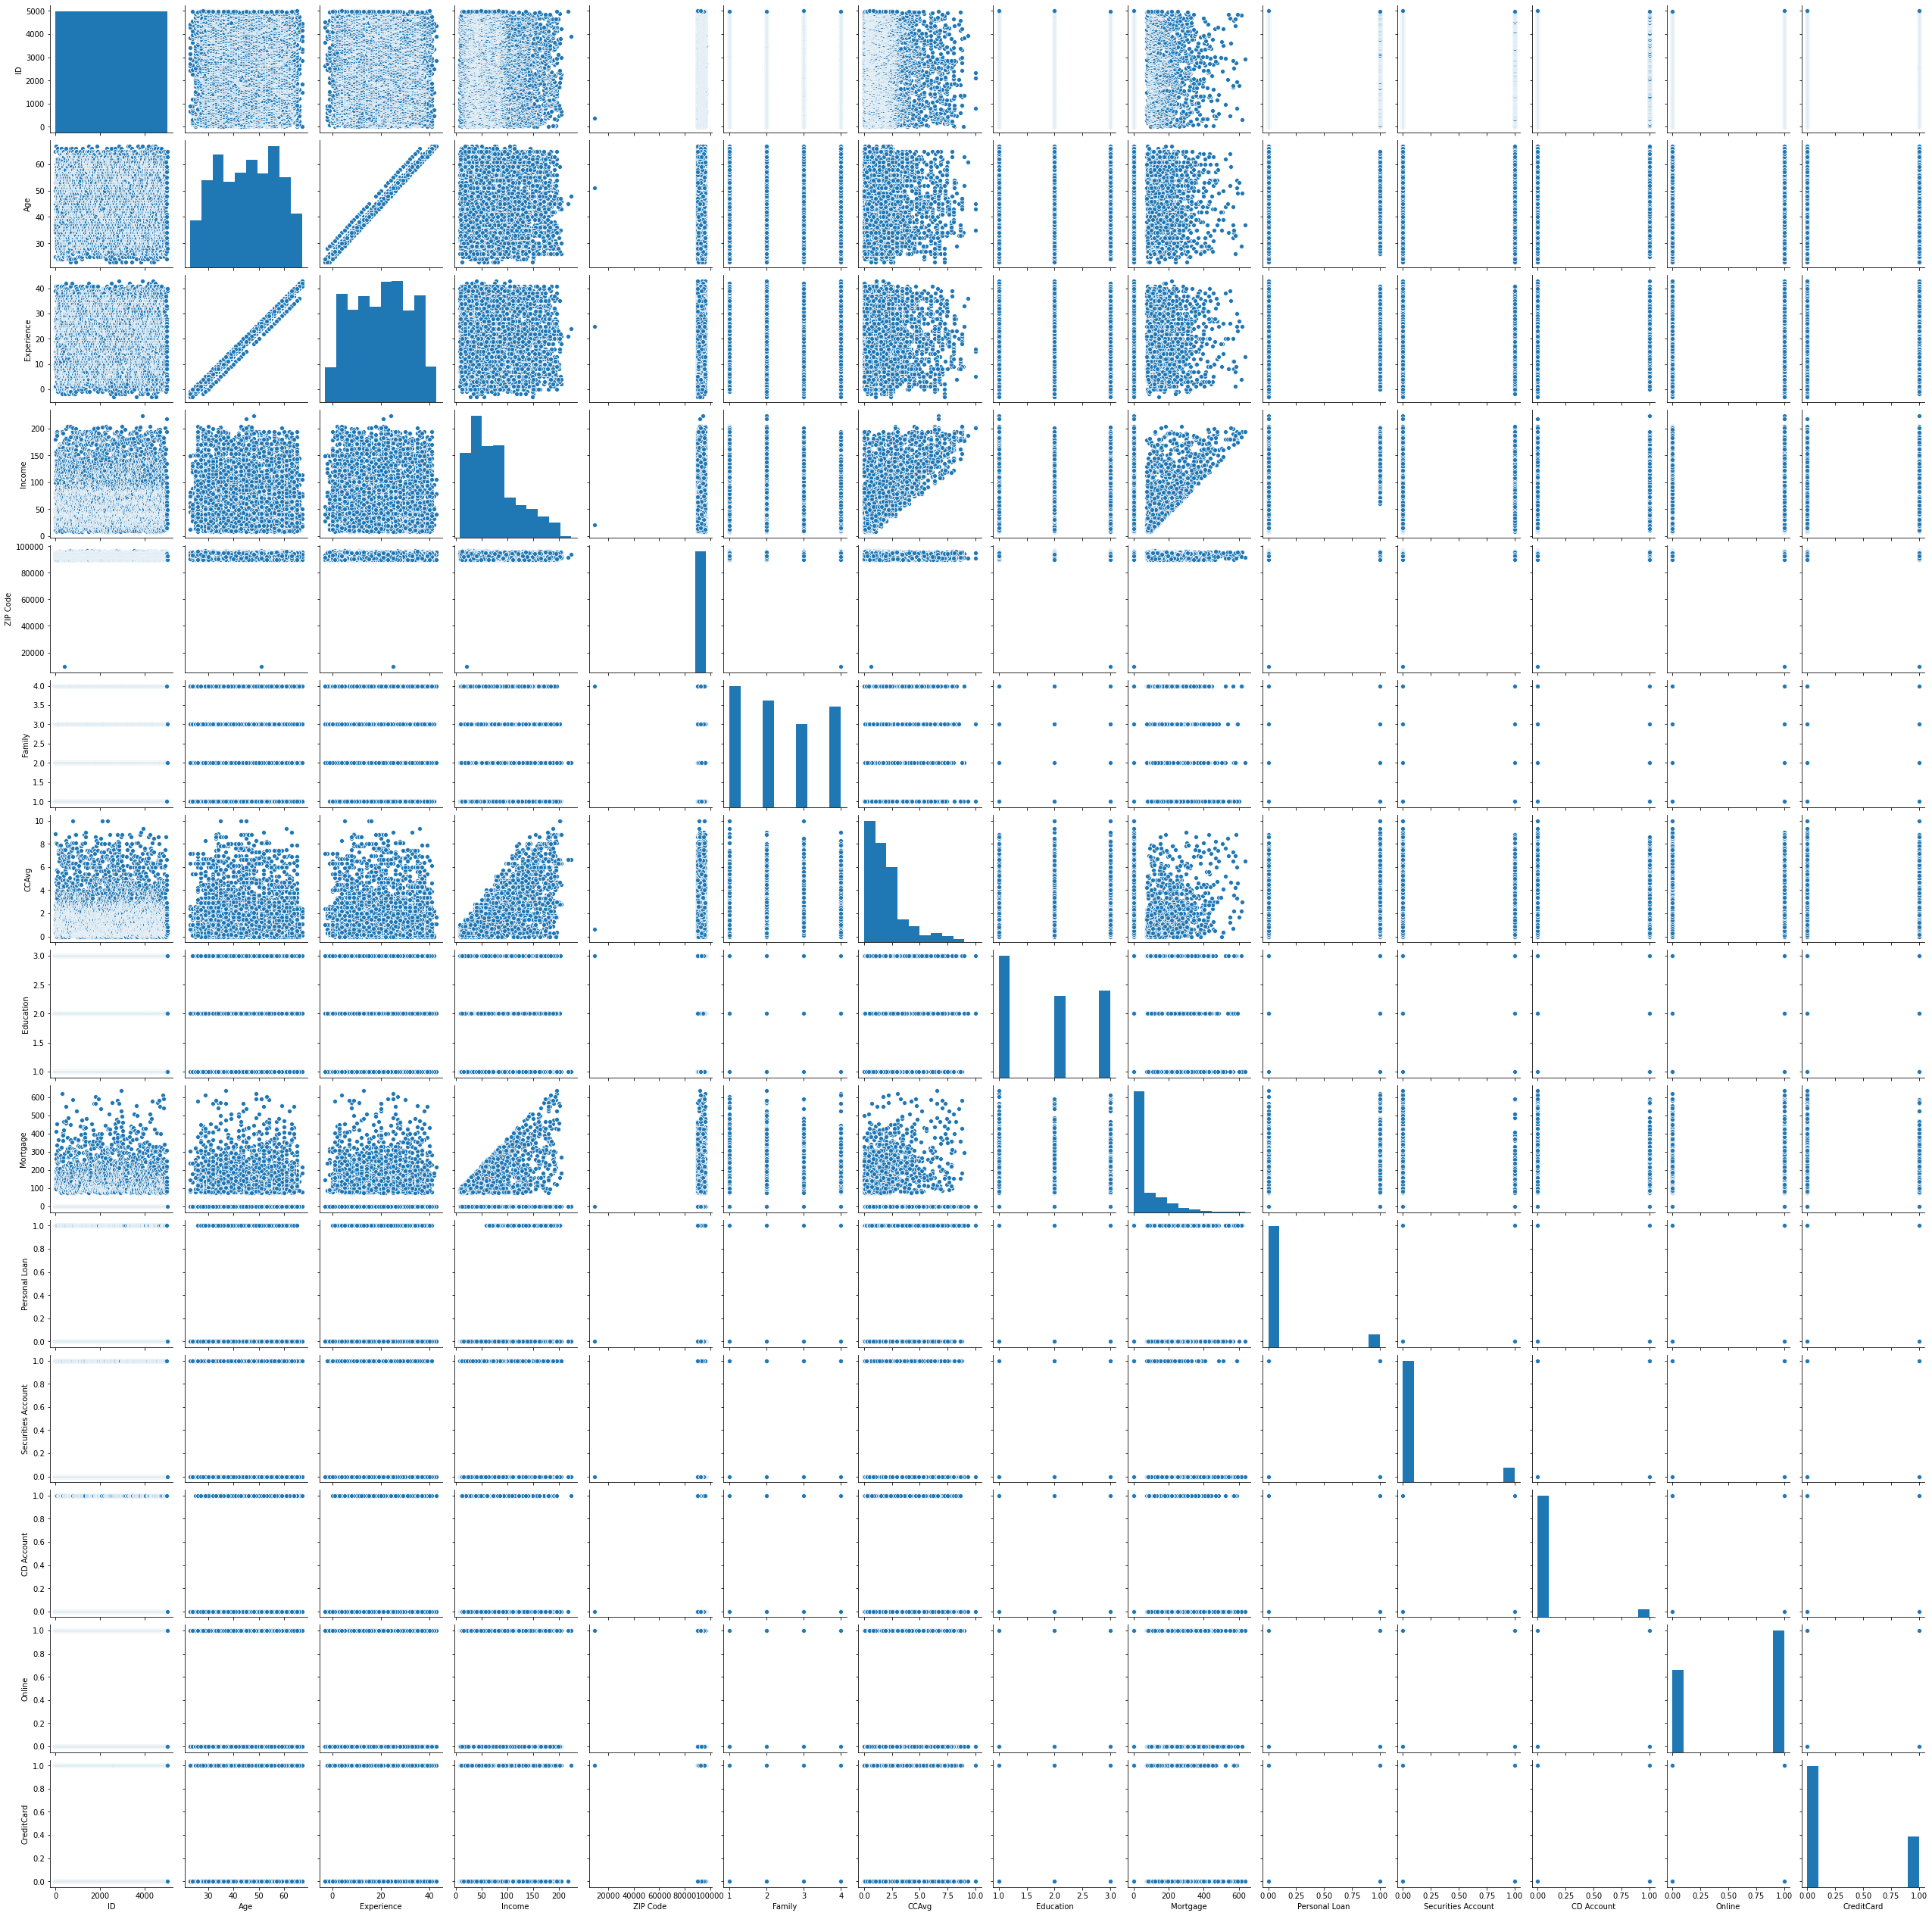

In [ ]:
sns.pairplot(data)

5) Univariate and Bivariate analysis


>**Univariate Analysis**






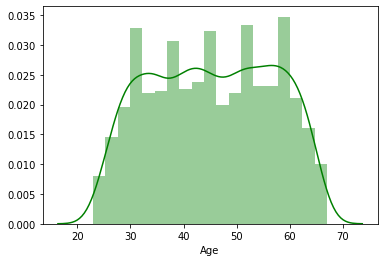

In [ ]:
sns.distplot(data.Age,color='G')

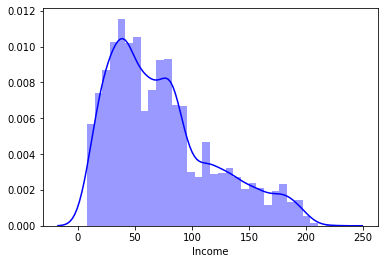

In [ ]:
sns.distplot(data.Income,color='B')

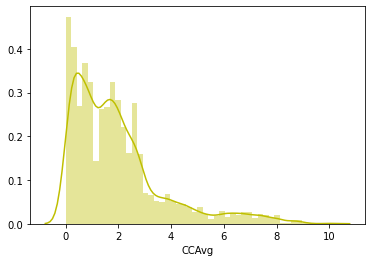

In [ ]:
sns.distplot(data.CCAvg,color='Y')

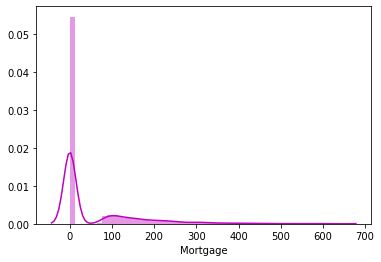

In [ ]:
sns.distplot(data.Mortgage,color='M')

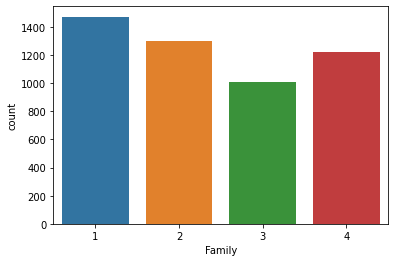

In [ ]:
sns.countplot(data.Family)

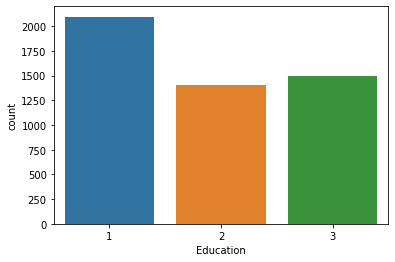

In [ ]:
sns.countplot(data.Education)

>**Multivariate Analysis**

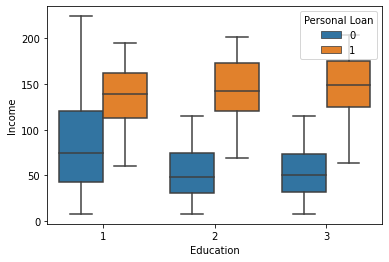

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)

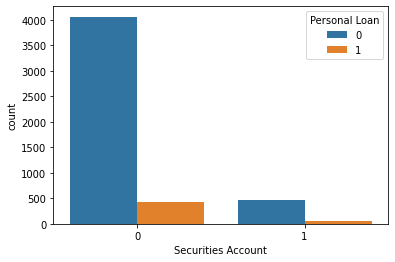

In [ ]:
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")

In [ ]:
print(data['Family'].value_counts())
print(data['Education'].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64


>**visualizing two classes in the target variable**

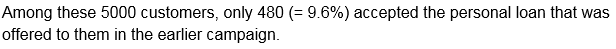

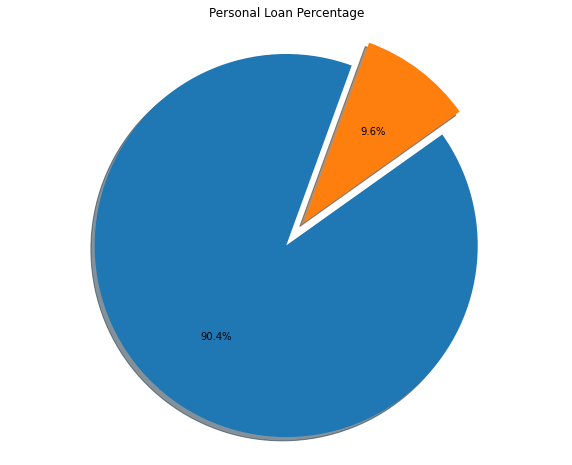

In [ ]:
DF=pd.DataFrame(data['Personal Loan'].value_counts()).reset_index()
DF.columns=['Labels','Personal Loan']
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(DF['Personal Loan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()

0    4520
1     480
Name: Personal Loan, dtype: int64


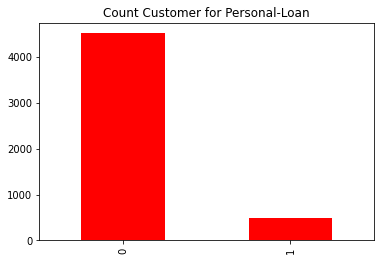

In [ ]:
print(data['Personal Loan'].value_counts(dropna = False))
count = data["Personal Loan"].value_counts()
#Zero means not interested Customer and 1 means Interested Customer(Accpted personal Loan)
count.plot(kind = "bar", title = "Count Customer for Personal-Loan",color='R')

>**Deal With Negative Values**

In [ ]:
#Replace with the median experience from people having the same age
dataset_Age = data[data.Experience >= 0].groupby('Age').Experience.median().to_frame('Experience Median').reindex()
data = pd.merge(data, dataset_Age, on = "Age", how = "left")
print(data.columns)
#value can be a floating point number
#~~Round up the value to integer
data.loc[data.Experience < 0, 'Experience'] = np.round(data['Experience Median'])
#Here 23 year old==null
#~~No Accurate data,replace the null data of Experience with 0
data.loc[data.Experience.isnull(),'Experience'] = 0

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Experience Median'],
      dtype='object')


In [ ]:
data.Experience.isnull().sum()

0



> **Correlation between Age and Experience and clean the data(Experience Median,ID,ZIP Code) that are not needed**



In [ ]:
data.drop(['ID', 'Experience Median', 'ZIP Code','Experience'],  inplace=True, axis=1)

Age    Income  ...    Online  CreditCard
Age                 1.000000 -0.055269  ...  0.013702    0.007681
Income             -0.055269  1.000000  ...  0.014206   -0.002385
Family             -0.046418 -0.157501  ...  0.010354    0.011588
CCAvg              -0.052012  0.645984  ... -0.003611   -0.006689
Education           0.041334 -0.187524  ... -0.015004   -0.011014
Mortgage           -0.012539  0.206806  ... -0.005995   -0.007231
Personal Loan      -0.007726  0.502462  ...  0.006278    0.002802
Securities Account -0.000436 -0.002616  ...  0.012627   -0.015028
CD Account          0.008043  0.169738  ...  0.175880    0.278644
Online              0.013702  0.014206  ...  1.000000    0.004210
CreditCard          0.007681 -0.002385  ...  0.004210    1.000000

[11 rows x 11 columns]

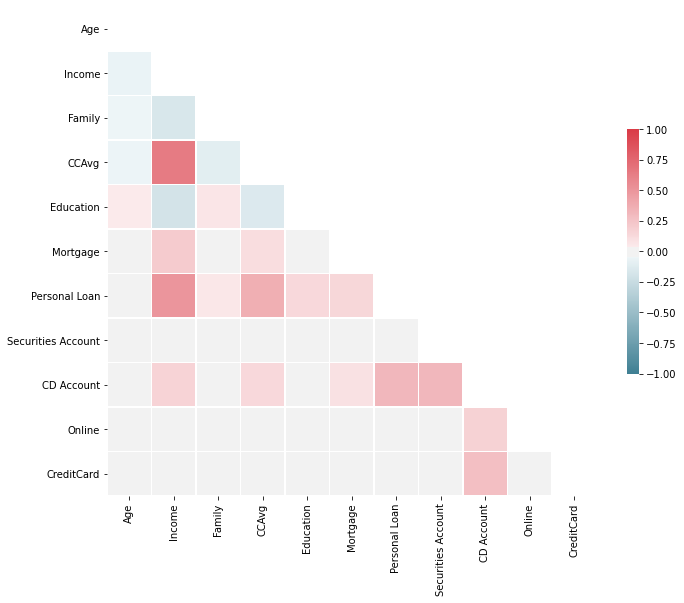

In [ ]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr

In [ ]:
dataset.corr()

NameError: ignored

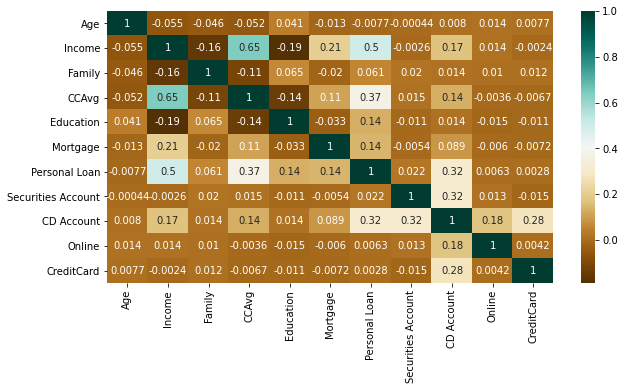

In [ ]:
plt.figure(figsize=(10,5))
cr = data.corr()
sns.heatmap(cr,cmap = "BrBG",annot = True)

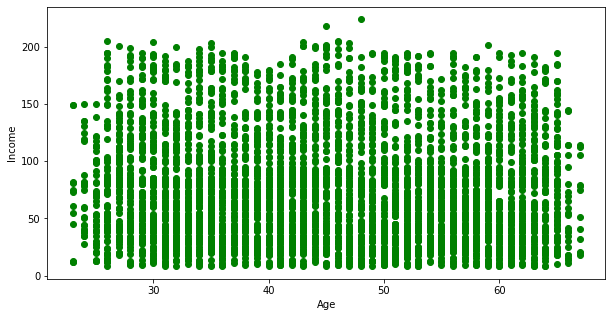

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(data['Age'],data['Income'],color='G')
ax.set_xlabel('Age')
ax.set_ylabel('Income')
plt.show()

Text(0.5, 0, 'Age')

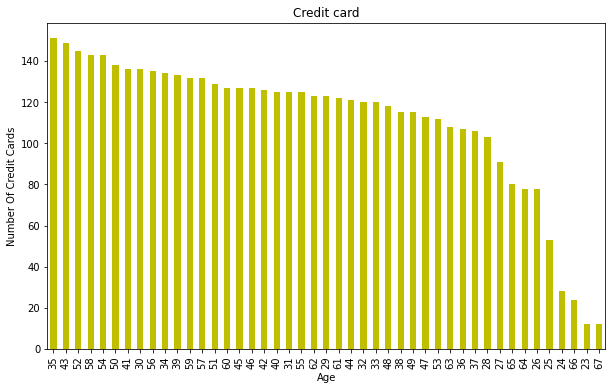

In [ ]:
data['Age'].value_counts().plot.bar(figsize = (10,6),color='Y')
plt.title("Credit card")
plt.ylabel('Number Of Credit Cards')
plt.xlabel('Age')

Text(0.5, 0, 'Securities Account')

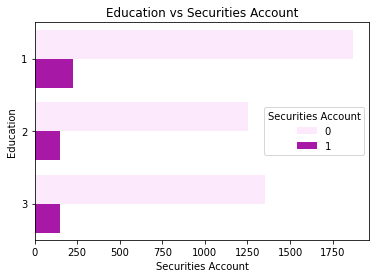

In [ ]:
sns.countplot(y='Education', data = data , hue = 'Securities Account',color='M')
plt.title('Education vs Securities Account')
plt.ylabel('Education')
plt.xlabel('Securities Account')

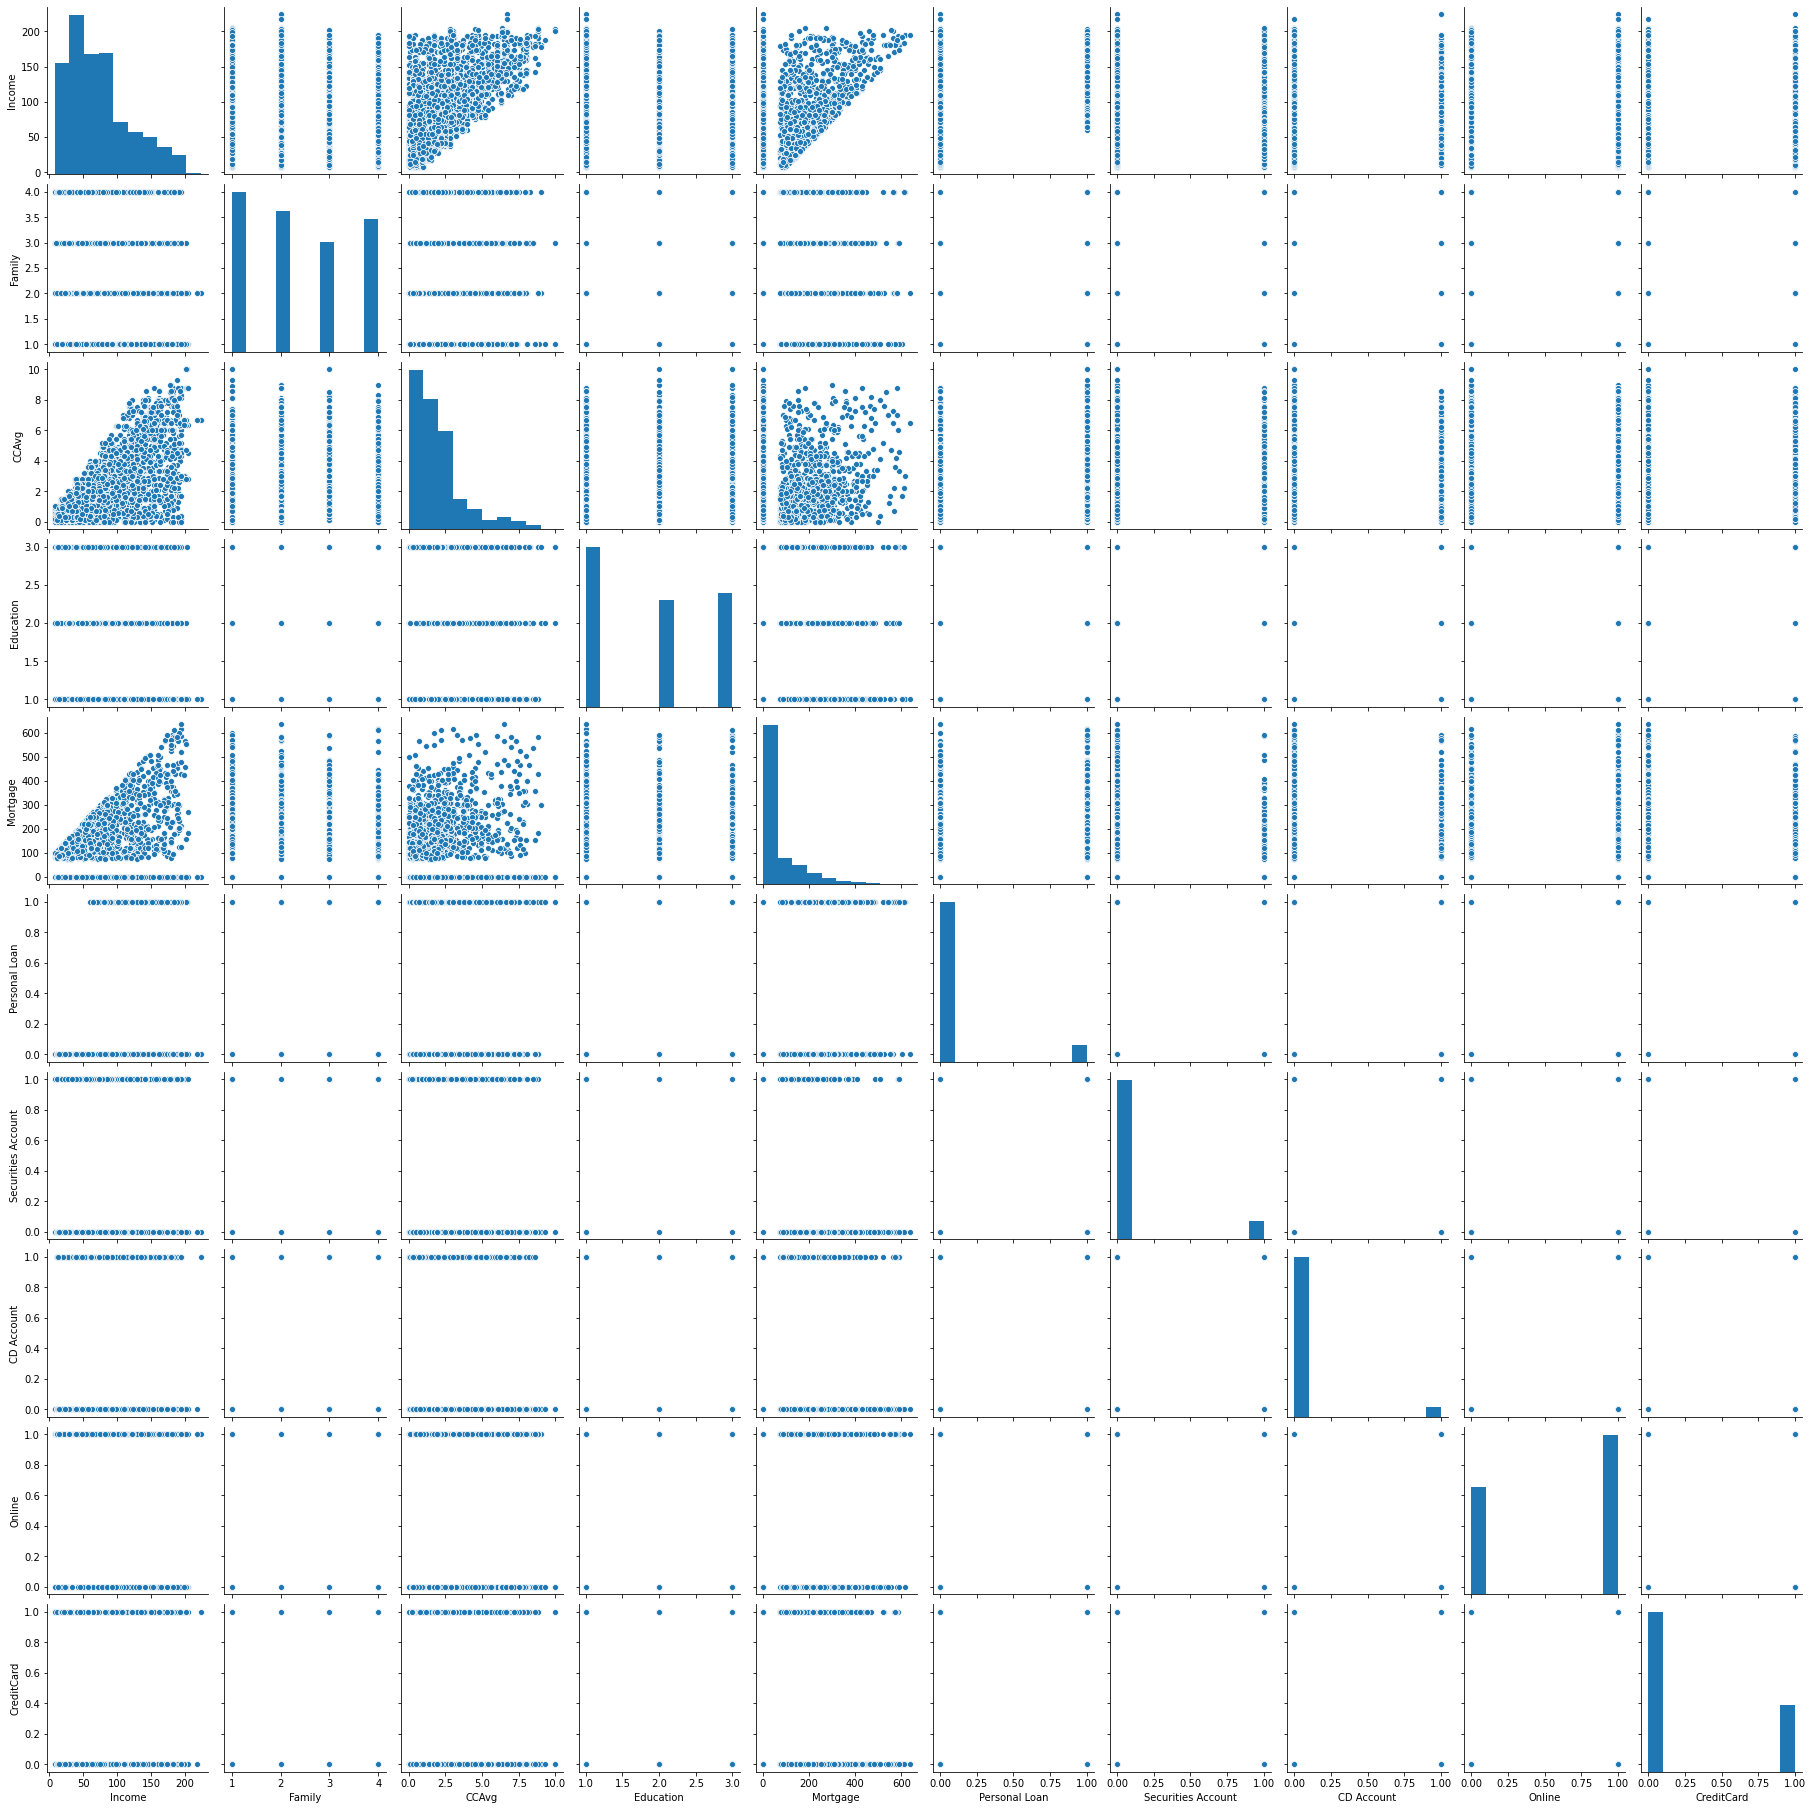

In [ ]:
sns.pairplot(data.iloc[:,1:])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   Family              5000 non-null   int64  
 3   CCAvg               5000 non-null   float64
 4   Education           5000 non-null   int64  
 5   Mortgage            5000 non-null   int64  
 6   Personal Loan       5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 628.8 KB


> **Task : 4**

>**Apply necessary transformations for the feature variables**


In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

for column in columns_to_scale:
    scaler = MinMaxScaler()
    data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))
    
data.head()

Age    Income    Family  ...  CD Account  Online  CreditCard
0  0.045455  0.189815  1.000000  ...           0       0           0
1  0.500000  0.120370  0.666667  ...           0       0           0
2  0.363636  0.013889  0.000000  ...           0       0           0
3  0.272727  0.425926  0.000000  ...           0       0           0
4  0.272727  0.171296  1.000000  ...           0       0           1

[5 rows x 11 columns]



> **Categorized Categorical Values**



In [ ]:
# Education, Family
data['Education'] = data['Education'].astype('category')
data['Family'] = data['Family'].astype('category')


In [ ]:
X = data.drop(['Personal Loan'], axis=1)
y = data['Personal Loan'].values

X.shape, y.shape

((5000, 10), (5000,))

>**Task : 5**


> **Normalise your data and split the data into training and test set in the ratio of 70:30 respectively**



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y,random_state=17)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3500, 10), (1500, 10), (3500,), (1500,))

In [ ]:
class_names = ['cant take loan','take loan']

> **Task : 6**

> **Use the Logistic Regression model to predict the likelihood of a customer buying personal loans**


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score,plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve


> **Task : 7**

> **Print all the metrics related for evaluating the model performance**

> **Logistic Regression**

In [ ]:
log_reg = LogisticRegression(C=1.0, max_iter=200)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic Regression Results: 
Training Accuracy: 0.95
Testing Accuracy: 0.95
Precision: 0.86
Recall: 0.55


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

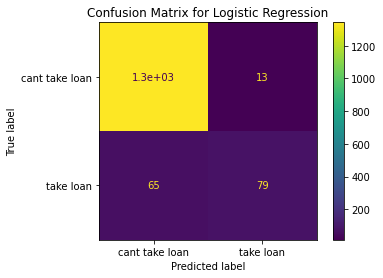

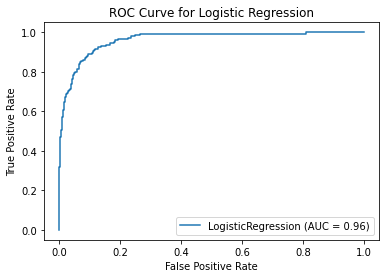

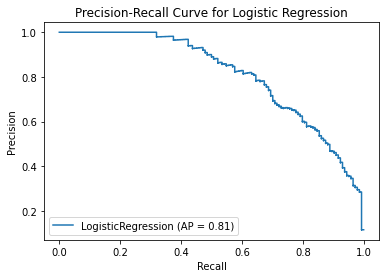

In [ ]:
print('Logistic Regression Results: ')

train_score = log_reg.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = log_reg.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_logi = log_reg.predict(X_test)

precision_logi = precision_score(y_test, y_pred_logi, labels=class_names).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(y_test, y_pred_logi).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(log_reg, X_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(log_reg, X_test, y_test)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(log_reg, X_test, y_test)
plt.title('Precision-Recall Curve for Logistic Regression')

>**Random Forect Classification**

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=300, max_depth=7,n_jobs=-1 )
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Random Forest Classifier Results: 
Training Accuracy: 0.99
Testing Accuracy: 0.98
Precision: 0.96
Recall: 0.86


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

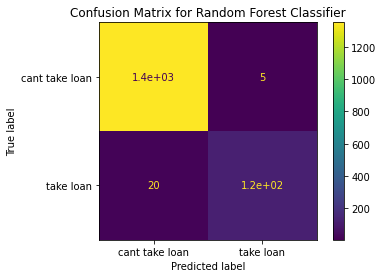

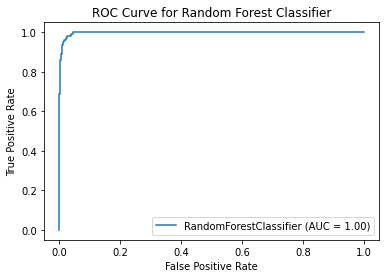

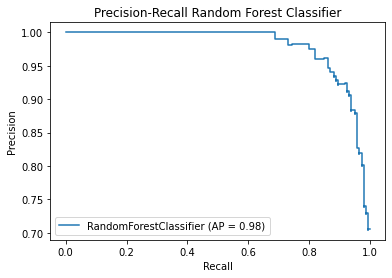

In [ ]:
print('Random Forest Classifier Results: ')

train_score = rf_clf.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = rf_clf.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_pred_rf = rf_clf.predict(X_test)

precision_rf = precision_score(y_test, y_pred_rf, labels=class_names).round(2)
print('Precision:', precision_rf)
recall_rf = recall_score(y_test, y_pred_rf).round(2)
print('Recall:', recall_rf)

plot_confusion_matrix(rf_clf, X_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(rf_clf, X_test, y_test)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(rf_clf, X_test, y_test)
plt.title('Precision-Recall Random Forest Classifier')

> **Task : 8 & 9**

>**Build various other classification algorithms and compare their performance**

>**Give a business understanding of your model**

> **Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred=dtc.predict(X_test)

Training Accuracy: 1.0
Testing Accuracy: 0.98
Precision: 0.89
Recall: 0.9


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

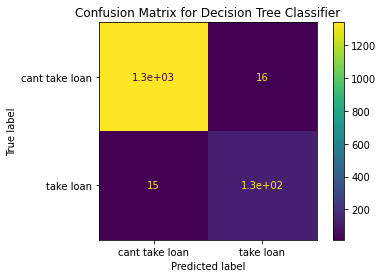

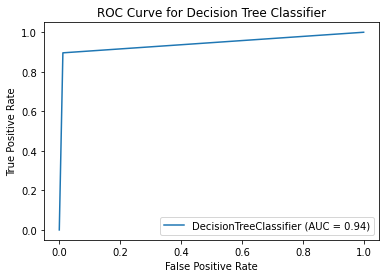

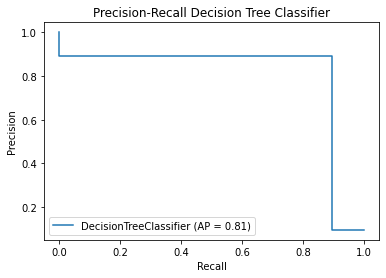

In [ ]:
train_score = dtc.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = dtc.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(y_test, y_pred, labels=class_names).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(y_test, y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(dtc, X_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(dtc, X_test, y_test)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(dtc, X_test, y_test)
plt.title('Precision-Recall Decision Tree Classifier')


> **Karnott Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k= KNeighborsClassifier(n_neighbors= 15,weights ='uniform',metric='euclidean')
k.fit(X_train,y_train)
y_pred=k.predict(X_test)

Training Accuracy: 0.95
Testing Accuracy: 0.94
Precision: 0.94
Recall: 0.42


Text(0.5, 1.0, 'Precision-Recall Decision Tree Classifier')

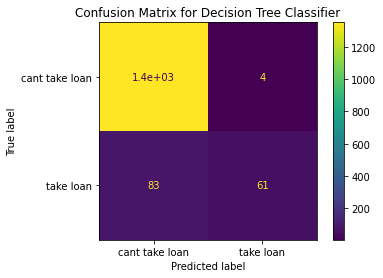

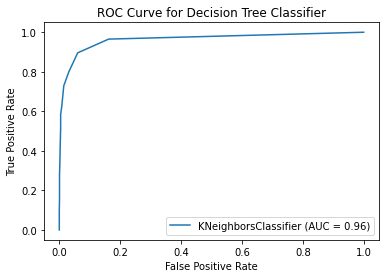

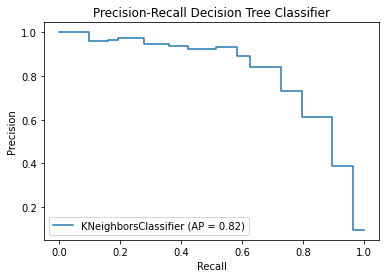

In [ ]:
train_score = k.score(X_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = k.score(X_test, y_test)
print('Testing Accuracy:', test_score.round(2))

precision_dt = precision_score(y_test, y_pred, labels=class_names).round(2)
print('Precision:', precision_dt)
recall_dt = recall_score(y_test, y_pred).round(2)
print('Recall:', recall_dt)

plot_confusion_matrix(k, X_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Decision Tree Classifier')

plot_roc_curve(k, X_test, y_test)
plt.title('ROC Curve for Decision Tree Classifier')

plot_precision_recall_curve(k, X_test, y_test)
plt.title('Precision-Recall Decision Tree Classifier')



---


**Project Completed**